In [2]:
print("hewo wrld")

hewo wrld


In [8]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [21]:
filename = "https://github.com/mchoimis/tsdl/raw/main/market/tr_eod_data_rounded.csv"
df = pd.read_csv(filename, parse_dates=True, index_col=0)
display(df.info())
display(df.head(3))
display(df.tail(3))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


None

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.8
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.7


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.16,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.17,1252.25,22.31,118.65


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

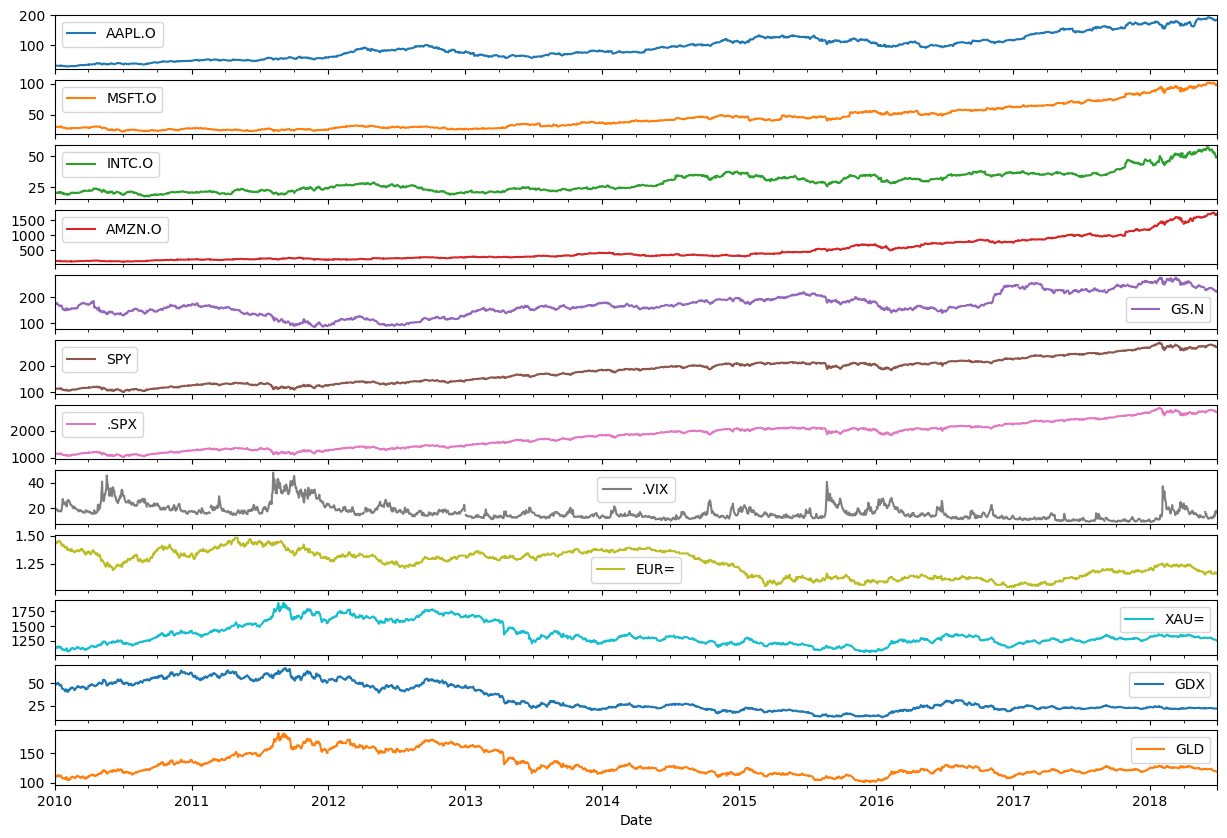

In [22]:
df.plot(figsize=(15, 10), subplots=True)

In [23]:
display(df.head(4))
display(df.diff().head())

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,23.65,NaN,NaN
2010-01-05,0.06,0.01,-0.01,0.79,3.06,0.30,3.53,-0.69,0.00,-1.35,0.46,-0.10
2010-01-06,-0.49,-0.19,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.00,19.85,1.17,1.81
2010-01-07,-0.06,-0.32,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.01,-6.60,-0.24,-0.69


In [24]:
df.diff().mean()

AAPL.O    0.064745
MSFT.O    0.031252
INTC.O    0.013552
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072101
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000117
XAU=      0.041887
GDX      -0.015070
GLD      -0.003455
dtype: float64

In [26]:
df.pct_change().head(5)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006993,0.021572,NaN,NaN
2010-01-05,0.001963,0.000323,-0.000479,0.005900,0.017680,0.002647,0.003116,-0.034431,0.000000,-0.001205,0.009642,-0.000911
2010-01-06,-0.015997,-0.006137,-0.003354,-0.018116,-0.010673,0.000704,0.000546,-0.009819,0.000000,0.017745,0.024289,0.016500
2010-01-07,-0.001991,-0.010400,-0.009615,-0.017013,0.019568,0.004221,0.004001,-0.005219,-0.006944,-0.005797,-0.004864,-0.006188


<Axes: >

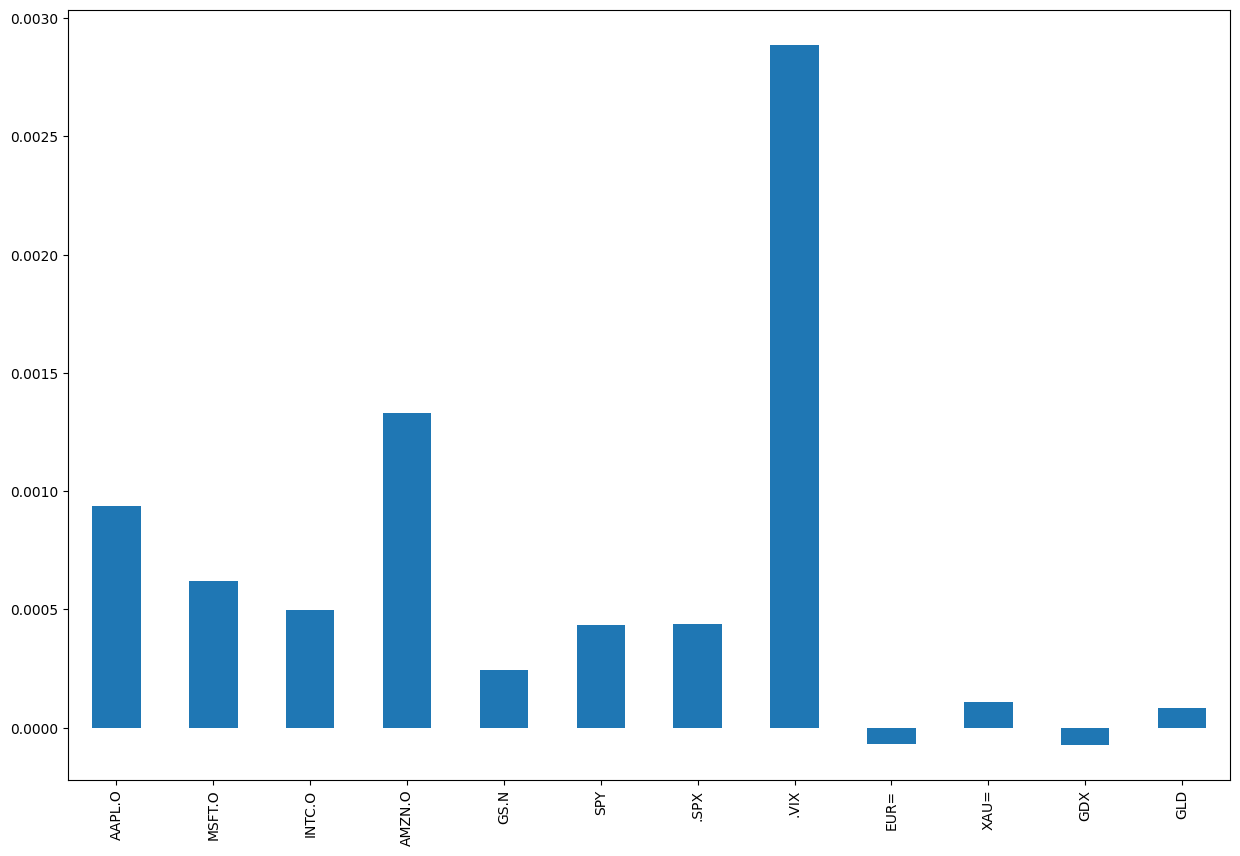

In [28]:
df.pct_change().mean().plot(kind='bar', figsize=(15, 10))